# Exploratory Data Analysis (EDA) 

Candidato: Pedro Araújo Pietrafesa

Faça uma EDA. Nesta EDA, crie e responda 3 hipóteses de negócio. 

Além disso,  responda também às seguintes perguntas de negócio:
* Qual o melhor estado cadastrado na base de dados para se vender um carro de marca popular e por quê?
* Qual o melhor estado para se comprar uma picape com transmissão automática e por quê?
* Qual o melhor estado para se comprar carros que ainda estejam dentro da garantia de fábrica e por quê?


# Bibliotecas

In [525]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import scipy.stats 
import math
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from scipy.stats import boxcox
from scipy import stats
from statsmodels.iolib.summary2 import summary_col
from skimage import io
import plotly.graph_objs as go
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder
from sfrancia import shapiroFrancia
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Importando a base de dados

In [459]:
treino = pd.read_csv('cars_train.csv')
pd.set_option('display.max_row', 100)
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29584 entries, 0 to 29583
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       29584 non-null  object 
 1   num_fotos                29407 non-null  float64
 2   marca                    29584 non-null  object 
 3   modelo                   29584 non-null  object 
 4   versao                   29584 non-null  object 
 5   ano_de_fabricacao        29584 non-null  int64  
 6   ano_modelo               29584 non-null  int64  
 7   hodometro                29584 non-null  int64  
 8   cambio                   29584 non-null  object 
 9   num_portas               29584 non-null  int64  
 10  tipo                     29584 non-null  object 
 11  blindado                 29584 non-null  object 
 12  cor                      29584 non-null  object 
 13  tipo_vendedor            29584 non-null  object 
 14  cidade_vendedor       

# EDA

Faça uma EDA. Nesta EDA, crie e responda 3 hipóteses de negócio.

## Primeira Hipótese de Negócio

In [460]:
# Preço médio por marca
preco_medio = treino.groupby('marca')['preco'].mean().reset_index()
preco_medio

,marca,preco
0,ALFA ROMEO,68172.543196
1,AUDI,159977.750342
2,BMW,200501.186503
3,BRM,47762.671070
4,CHERY,121716.542251
5,CHEVROLET,93187.683964
6,CHRYSLER,62569.784568
7,CITROËN,73494.483671
8,DODGE,74370.666723
9,EFFA,40163.175830


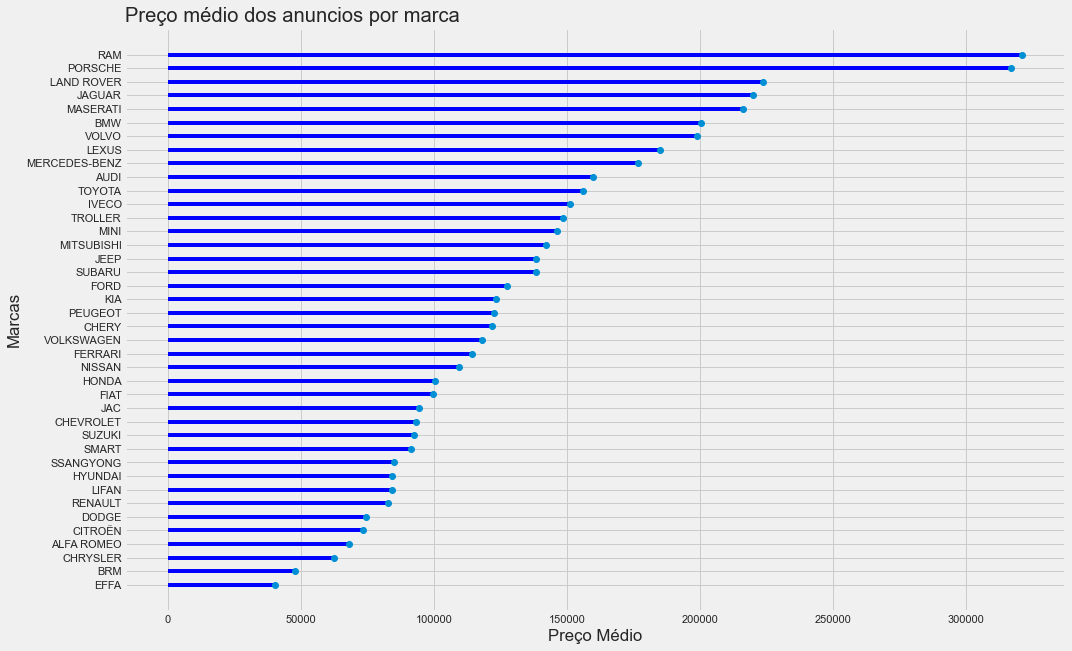

In [461]:
# Reordenando os valores do preço médio

order_df = preco_medio.sort_values(by='preco')
dist=range(1,len(preco_medio.index)+1)

plt.figure(figsize=(15,10))

# Plota na horizontal
plt.hlines(y=dist, xmin=0, xmax=order_df['preco'], color='blue')
plt.plot(order_df['preco'], dist, "o")
 
# Adicionando títulos aos eixos
plt.yticks(dist, order_df['marca'])
plt.title("Preço médio dos anuncios por marca", loc='left')
plt.xlabel('Preço Médio')
plt.ylabel('Marcas')

# Show the plot
plt.show()



Ao analisarmos o preço médio dos carros anunciados por marca, fica evidente que a maioria das marcas que oferecem carros de luxo e picapes apresentam os valores médios mais altos no dataset. Essa seria uma observação esperada. No entanto, surpreendentemente, a Ferrari possui apenas o vigésimo terceiro preço médio mais alto entre as quarenta marcas anunciadas, ficando atrás da Volkswagen e Chery, por exemplo. Esse resultado chamou a atenção para o fato de que, nas análises, a marca por si só não é um fator determinante para atingir os valores mais altos do mercado. É importante considerar outros fatores, como o ano de fabricação e a quilometragem dos veículos, para compreender melhor os padrões de precificação.


In [462]:
ferrari = treino[treino['marca'] == "FERRARI"]
ferrari

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,...,elegivel_revisao,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,veiculo_alienado,preco
11942,138636304192524477615326359432529235815,8.0,FERRARI,F360,3.6 F1 SPIDER V8 40V GASOLINA 2P AUTOMÁTICO,2005,2012,155896,Manual,2,...,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,114439.2363


Vamos verificar a hipótese de que carros de marcas de luxo com alta quilometragem e data de fabricação acima de dez anos tem preço médio similar a carro de marca popular semi novo.

### Respondendo a primeira hipótese de negócio

In [463]:
# definir condições e escolhas para fab_condicao

condicoes = [
    treino['ano_de_fabricacao'] > 2012,
    treino['ano_de_fabricacao'] < 2013             
            ]

escolhas = [
           'Semi Novo',
           'Usado'         
            ]

# criar nova coluna "fab_condicao" baseada em condições e escolhas
treino['fab_condicao'] = np.select(condicoes, escolhas)

pd.DataFrame(treino['fab_condicao'].value_counts(dropna = False))

,fab_condicao
Semi Novo,27688
Usado,1896


In [464]:
# definir condições e escolhas para km_rodado


condicoes = [
    treino['hodometro'] <= 50000,
    (treino['hodometro'] > 50000) & (treino['hodometro'] <= 100000),
    treino['hodometro'] > 100000
            ]

escolhas = [
           'Baixa',
           'Média',
           'Alta'
            ]

# criar nova coluna "km_rodado" baseada em condições e escolhas
treino['km_rodado'] = np.select(condicoes, escolhas)

pd.DataFrame(treino['km_rodado'].value_counts(dropna = False))

,km_rodado
Média,14082
Baixa,12868
Alta,2634


In [466]:
# definir condições e escolhas para tipo_marca

condicoes = [
    ((treino['marca'] == 'VOLKSWAGEN') & (treino['marca'] == 'CHEVROLET') & 
    (treino['marca'] == 'HYUNDAI') & (treino['marca'] == 'TOYOTA') &
    (treino['marca'] == 'JEEP') & (treino['marca'] == 'FIAT') &
    (treino['marca'] == 'PEUGEOT') & (treino['marca'] == 'HONDA') &
    (treino['marca'] == 'FORD') & (treino['marca'] == 'RENAULT') &
    (treino['marca'] == 'NISSAN') & (treino['marca'] == 'CITROËN') &
    (treino['marca'] == 'KIA')) ,
    
    ((treino['marca'] != 'VOLKSWAGEN') & (treino['marca'] != 'CHEVROLET') & 
    (treino['marca'] != 'HYUNDAI') & (treino['marca'] != 'TOYOTA') &
    (treino['marca'] != 'JEEP') & (treino['marca'] != 'FIAT') &
    (treino['marca'] != 'PEUGEOT') & (treino['marca'] != 'HONDA') &
    (treino['marca'] != 'FORD') & (treino['marca'] != 'RENAULT') &
    (treino['marca'] != 'NISSAN') & (treino['marca'] != 'CITROËN') &
    (treino['marca'] != 'KIA'))             
]

escolhas = [
           'Popular',
           'Não Popular'         
            ]

# criar nova coluna "tipo_marca" baseada em condições e escolhas
treino['tipo_marca'] = np.select(condicoes, escolhas, default = 'Popular')

In [467]:
# Criando um banco de dados agrupado por mais de um critério
dados = treino.groupby(["fab_condicao", "km_rodado","tipo_marca"])['preco'].mean().reset_index() 
dados


,fab_condicao,km_rodado,tipo_marca,preco
0,Semi Novo,Alta,Não Popular,122090.801444
1,Semi Novo,Alta,Popular,84858.859604
2,Semi Novo,Baixa,Não Popular,259459.206291
3,Semi Novo,Baixa,Popular,133766.184426
4,Semi Novo,Média,Não Popular,154371.489726
5,Semi Novo,Média,Popular,102552.591263
6,Usado,Alta,Não Popular,68041.786669
7,Usado,Alta,Popular,56710.815482
8,Usado,Baixa,Não Popular,117486.389694
9,Usado,Baixa,Popular,90806.737392


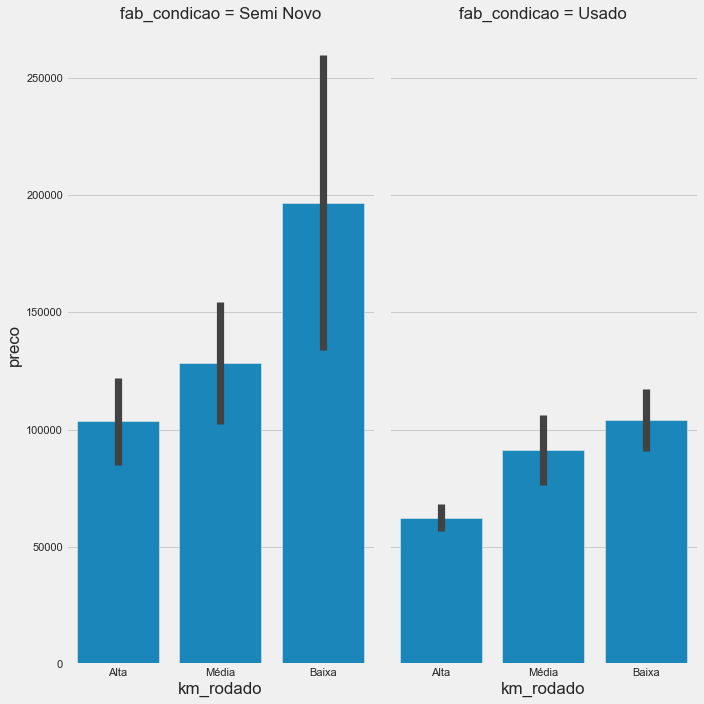

In [468]:

g = sns.FacetGrid(dados, col="fab_condicao", height=10, aspect=.5)
g.map(sns.barplot, "km_rodado", "preco", order=["Alta", "Média","Baixa"])
plt.show()

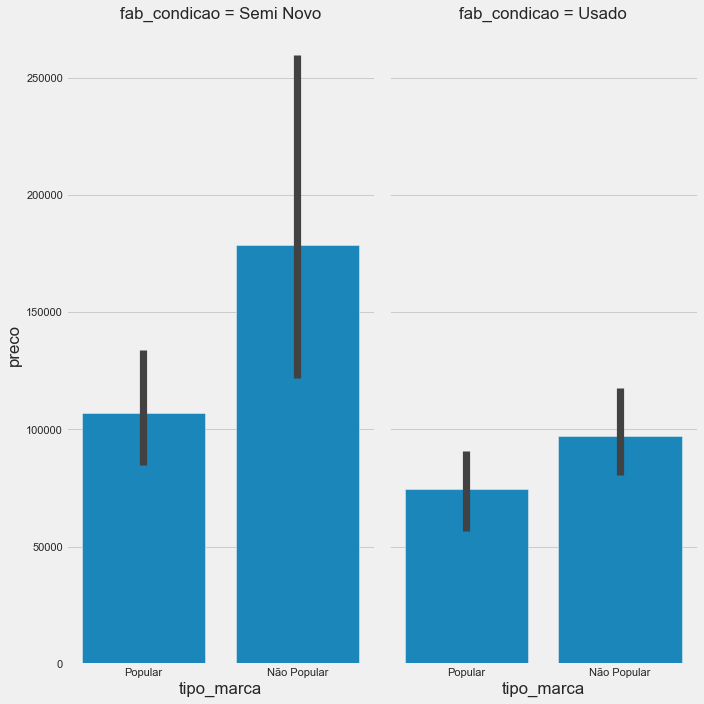

In [469]:

g = sns.FacetGrid(dados, col="fab_condicao", height=10, aspect=.5)
g.map(sns.barplot, "tipo_marca", "preco", order=["Popular", "Não Popular"])
plt.show()

In [501]:

fab_condicao_usa = treino[(treino['fab_condicao'] == "Usado") & (treino['km_rodado'] == "Alta")]
fab_condicao_sem = treino[(treino['fab_condicao'] == "Semi Novo")]

nao_pop = fab_condicao_usa[(fab_condicao_usa['tipo_marca'] == 'Não Popular')]
pop = fab_condicao_sem[(fab_condicao_sem['tipo_marca'] == 'Popular')]



In [503]:
# Teste de Shapiro-Francia
shapiroFrancia(nao_pop['preco'])

{'method': 'Shapiro-Francia normality test',
 'statistics W': 0.8918132646696821,
 'statistics z': 7.077498516136619,
 'p-value': 7.338988200770408e-13}

In [502]:
shapiroFrancia(pop['preco'])

{'method': 'Shapiro-Francia normality test',
 'statistics W': 0.8821004499694749,
 'statistics z': 19.73516900760169,
 'p-value': 5.379326252098572e-87}

In [504]:
scipy.stats.mannwhitneyu(nao_pop['preco'], pop['preco'])                     

MannwhitneyuResult(statistic=1478144.0, pvalue=1.1906875847548351e-70)

Vamos verificar a hipótese de que 

A primeira hipótese de que carros de marcas de luxo com alta quilometragem e data de fabricação acima de dez anos tem preço médio similar a carro de marca popular semi novo foi rejeitado pelo teste de Mann-Whitney. Assim, o caso da Ferrari foi uma excessão no banco de dados.

 ## Segunda Hipótese de Negócio

Passamos a observar o comportamento das variáveis numéricas 

### Correlação entre as variáveis numéricas

In [470]:
y = treino[['num_fotos', 'hodometro', 'num_portas', 'preco']]
y.corr()


,num_fotos,hodometro,num_portas,preco
num_fotos,1.000000,0.027550,0.011245,-0.032331
hodometro,0.027550,1.000000,-0.055628,-0.359218
num_portas,0.011245,-0.055628,1.000000,-0.075265
preco,-0.032331,-0.359218,-0.075265,1.000000


<Figure size 1080x720 with 0 Axes>

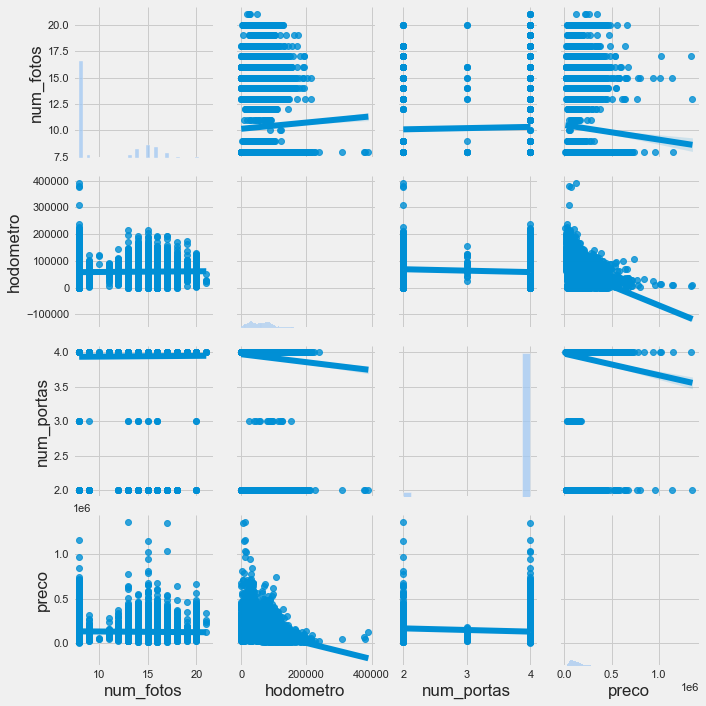

In [471]:
# Gráfico de Correlação com Regressão

plt.figure(figsize=(15,10))
sns.pairplot(y, kind="reg")
plt.show()

O número de fotos e o preço anunciado do veículo não tem correlação nenhuma, praticamente zero. Esta variável faz mais sentido na avaliação se os carros foram vendidos ou não numa pesquisa voltada para os instrumentos de marketing. A quilometragem, por sua vez apresentou correlação negativa fraca com o preço. 

Visualizada as relações entre as variáveis numéricas, continuaremos explorando os dados categóricos apresentados no _dataset_. A próxima variável corresponde a cidade do vendendor. Vamos analisar se há diferenças entre capitais e cidades do interior.


In [478]:
pd.set_option('display.max_row', 100)
pd.DataFrame(treino['cidade_vendedor'].value_counts(dropna = False))

,cidade_vendedor
São Paulo,6158
Rio de Janeiro,5793
Belo Horizonte,2172
Presidente Prudente,1536
Goiânia,1396
...,...
Garopaba,1
Porto Feliz,1
Antônio Carlos,1
Panambi,1


In [479]:
# definir condições e escolhas para local_vend

condicoes = [
    ((treino['cidade_vendedor'] == 'São Paulo') | (treino['cidade_vendedor'] == 'Rio de Janeiro') | 
    (treino['cidade_vendedor'] == 'Belo Horizonte') | (treino['cidade_vendedor'] == 'Goiânia') |
    (treino['cidade_vendedor'] == 'Porto Alegre') | (treino['cidade_vendedor'] == 'Salvador') |
    (treino['cidade_vendedor'] == 'Recife') | (treino['cidade_vendedor'] == 'Curitiba') |
    (treino['cidade_vendedor'] == 'Fortaleza') | (treino['cidade_vendedor'] == 'Maceió') |
    (treino['cidade_vendedor'] == 'Florianópolis') | (treino['cidade_vendedor'] == 'Manaus') |
    (treino['cidade_vendedor'] == 'Campo Grande') | (treino['cidade_vendedor'] == 'Belém') |
    (treino['cidade_vendedor'] == 'Vitória') | (treino['cidade_vendedor'] == 'Brasília') | 
    (treino['cidade_vendedor'] == 'Cuiabá') | (treino['cidade_vendedor'] == 'João Pessoa') | 
    (treino['cidade_vendedor'] == 'Aracaju') | (treino['cidade_vendedor'] == 'Palmas') | 
    (treino['cidade_vendedor'] == 'Rio Branco') | (treino['cidade_vendedor'] == 'São Luís') | 
    (treino['cidade_vendedor'] == 'Teresina') | (treino['cidade_vendedor'] == 'Porto Velho') |
    (treino['cidade_vendedor'] == 'Boa Vista')) ,
    
    ((treino['cidade_vendedor'] != 'São Paulo') | (treino['cidade_vendedor'] != 'Rio de Janeiro') | 
    (treino['cidade_vendedor'] != 'Belo Horizonte') | (treino['cidade_vendedor'] != 'Goiânia') |
    (treino['cidade_vendedor'] != 'Porto Alegre') | (treino['cidade_vendedor'] != 'Salvador') |
    (treino['cidade_vendedor'] != 'Recife') | (treino['cidade_vendedor'] != 'Curitiba') |
    (treino['cidade_vendedor'] != 'Fortaleza') | (treino['cidade_vendedor'] != 'Maceió') |
    (treino['cidade_vendedor'] != 'Florianópolis') | (treino['cidade_vendedor'] != 'Manaus') |
    (treino['cidade_vendedor'] != 'Campo Grande') | (treino['cidade_vendedor'] != 'Belém') |
    (treino['cidade_vendedor'] != 'Vitória') | (treino['cidade_vendedor'] != 'Brasília') | 
    (treino['cidade_vendedor'] != 'Cuiabá') | (treino['cidade_vendedor'] != 'João Pessoa') | 
    (treino['cidade_vendedor'] != 'Aracaju') | (treino['cidade_vendedor'] != 'Palmas') | 
    (treino['cidade_vendedor'] != 'Rio Branco') | (treino['cidade_vendedor'] != 'São Luís') | 
    (treino['cidade_vendedor'] != 'Teresina') | (treino['cidade_vendedor'] != 'Porto Velho') |
    (treino['cidade_vendedor'] != 'Boa Vista'))             
]

escolhas = [
           'Capital',
           'Interior'         
            ]

# criar nova coluna "local_vend" baseada em condições e escolhas
treino['local_vend'] = np.select(condicoes, escolhas, default = 'Capital')
pd.DataFrame(treino['local_vend'].value_counts(dropna = False))

,local_vend
Capital,19043
Interior,10541


In [483]:

cap_int = treino.groupby('local_vend')['preco'].mean().reset_index() 
cap_int

,local_vend,preco
0,Capital,132505.005713
1,Interior,133961.259708


In [484]:
treino.loc[ treino["troca"] == False, "troca"] = "Não"
treino.loc[ treino["troca"] == True, "troca"] = "Sim"
troca_m = treino.groupby('troca')['preco'].mean().reset_index() 
troca_m

,troca,preco
0,Não,135006.541472
1,Sim,123416.922714


A segunda hipótese consiste que os carros anunciados em ciadades do interior e que já foram trocados anteriormente são mais caros em média do que os da capital.


In [486]:
# Criando um banco de dados agrupado por mais de um critério
dados_cap_int_tr = treino.groupby(["local_vend", "troca"])['preco'].mean().reset_index() 
dados_cap_int_tr

,local_vend,troca,preco
0,Capital,Não,134345.774162
1,Capital,Sim,122761.585940
2,Interior,Não,136250.782010
3,Interior,Sim,124391.394005


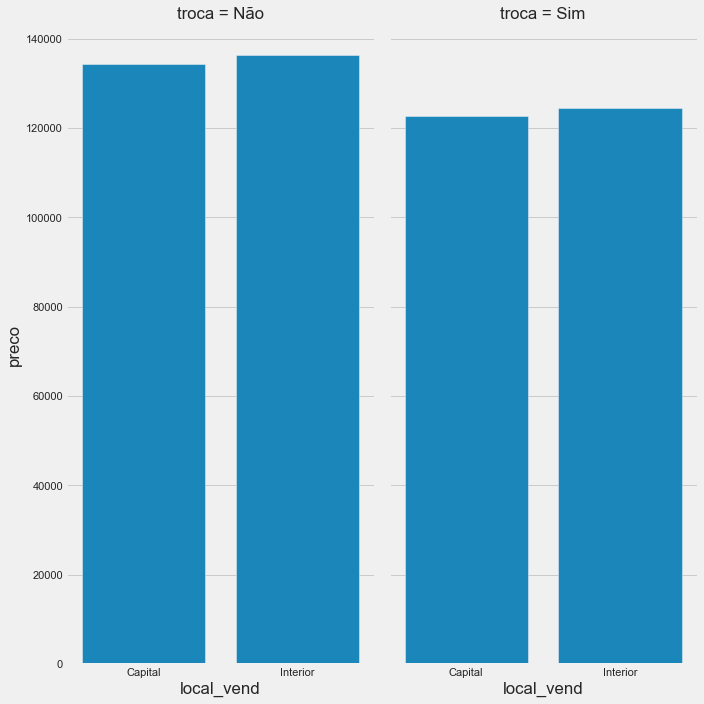

In [487]:
g = sns.FacetGrid(dados_cap_int_tr, col="troca", height=10, aspect=.5)
g.map(sns.barplot, "local_vend", "preco", order=["Capital", "Interior"])
plt.show()

In [507]:
troca_sim = treino[(treino['troca'] == "Sim")]

cap = troca_sim[(troca_sim['local_vend'] == 'Capital')]
inte = troca_sim[(troca_sim['local_vend'] == 'Interior')]




In [508]:
shapiroFrancia(cap['preco'])

{'method': 'Shapiro-Francia normality test',
 'statistics W': 0.7750135491325757,
 'statistics z': 14.795956292341453,
 'p-value': 7.77788186431476e-50}

In [506]:
shapiroFrancia(inte['preco'])

{'method': 'Shapiro-Francia normality test',
 'statistics W': 0.7783363341365606,
 'statistics z': 13.529410416141042,
 'p-value': 5.2430633835216616e-42}

In [509]:
scipy.stats.mannwhitneyu(cap['preco'], inte['preco'])  

MannwhitneyuResult(statistic=3048644.0, pvalue=0.5520366557209049)

Como o teste de Mann-Whitney não rejeitou a hipótese de que as médias de preço entre interior e capital não são significativamente diferentes nos casos em que houve uma troca de proprietário anteriormente, a hipótese número dois foi rejeitada. Assim, os compradores não podem esperar, em média, que os preços anunciados no banco de dados sejam significativamente diferentes se o local do vendedor for em município da capital do estado ou não. 

No banco de dados, há muitas anunciantes de cidades de porte médio e grande dos estados do sudeste, o que pode influenciar nas dinâmicas dos preços. Não há uma variável populacional, mas estes municípios são maiores do que capitais do Norte, Centro-Oeste e Nodedeste do país, com dinâmicas econômicas tão diversificadas quanto as de capitais.

## Terceira Hipótese de Negócio

In [510]:
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29584 entries, 0 to 29583
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       29584 non-null  object 
 1   num_fotos                29407 non-null  float64
 2   marca                    29584 non-null  object 
 3   modelo                   29584 non-null  object 
 4   versao                   29584 non-null  object 
 5   ano_de_fabricacao        29584 non-null  int64  
 6   ano_modelo               29584 non-null  int64  
 7   hodometro                29584 non-null  int64  
 8   cambio                   29584 non-null  object 
 9   num_portas               29584 non-null  int64  
 10  tipo                     29584 non-null  object 
 11  blindado                 29584 non-null  object 
 12  cor                      29584 non-null  object 
 13  tipo_vendedor            29584 non-null  object 
 14  cidade_vendedor       

In [511]:
treino.groupby('cor')['preco'].mean().reset_index() 


,cor,preco
0,Branco,130159.661644
1,Cinza,197087.176386
2,Dourado,88728.360365
3,Prata,95666.495126
4,Preto,136943.250395
5,Verde,60668.799680
6,Vermelho,56046.777580


In [512]:
# Criando um banco de dados agrupado por mais de um critério
cor = treino.groupby(["cor", "tipo_marca"])['preco'].mean().reset_index() 
cor

,cor,tipo_marca,preco
0,Branco,Não Popular,183840.172563
1,Branco,Popular,114242.881856
2,Cinza,Não Popular,257443.575472
3,Cinza,Popular,162796.400706
4,Dourado,Popular,88728.360365
5,Prata,Não Popular,60660.653569
6,Prata,Popular,98703.830942
7,Preto,Não Popular,179534.460871
8,Preto,Popular,100932.142662
9,Verde,Popular,60668.799680


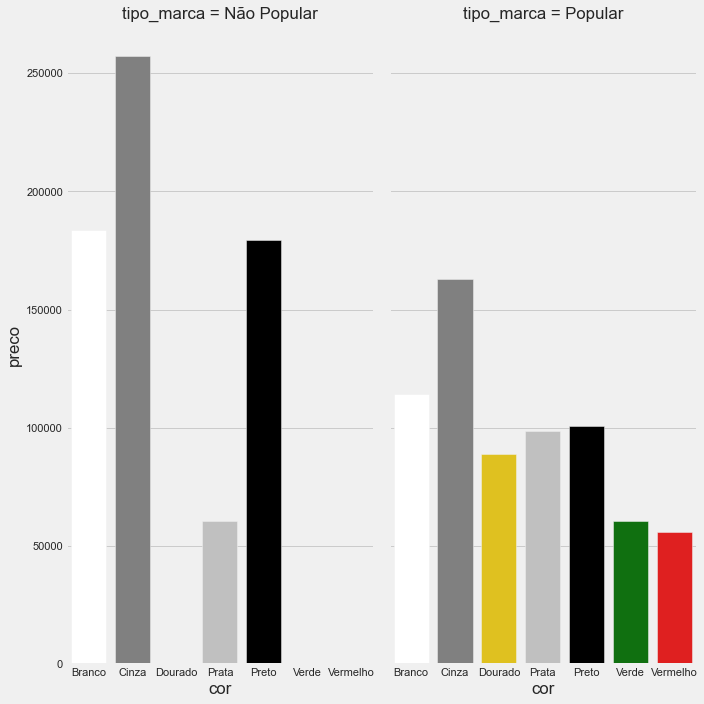

In [518]:
g = sns.FacetGrid(cor, col="tipo_marca", height=10, aspect=.5)
g.map(sns.barplot, "cor", "preco", order=["Branco", "Cinza", "Dourado", "Prata", "Preto","Verde", "Vermelho"],
     palette=['white', 'grey', 'gold', 'silver', 'black', 'green', 'red'])
plt.show()

Podemos observar do gráfico de barras que as cores para os carros de marcas não populares parece, da análise exploratória,ter influência na média dos preços do veíuclos anunciados. Vamos testar a hipótese de que para os carros das marcas populares também há diferença média de preços nas cores branco, prata e preto. 

Pelo gráfico, vemos que a distância entre as cores dourado, prata e preto, a princípio, não são muito significativas. As cores cinza, verde e vermelho são as três discrepantes. 

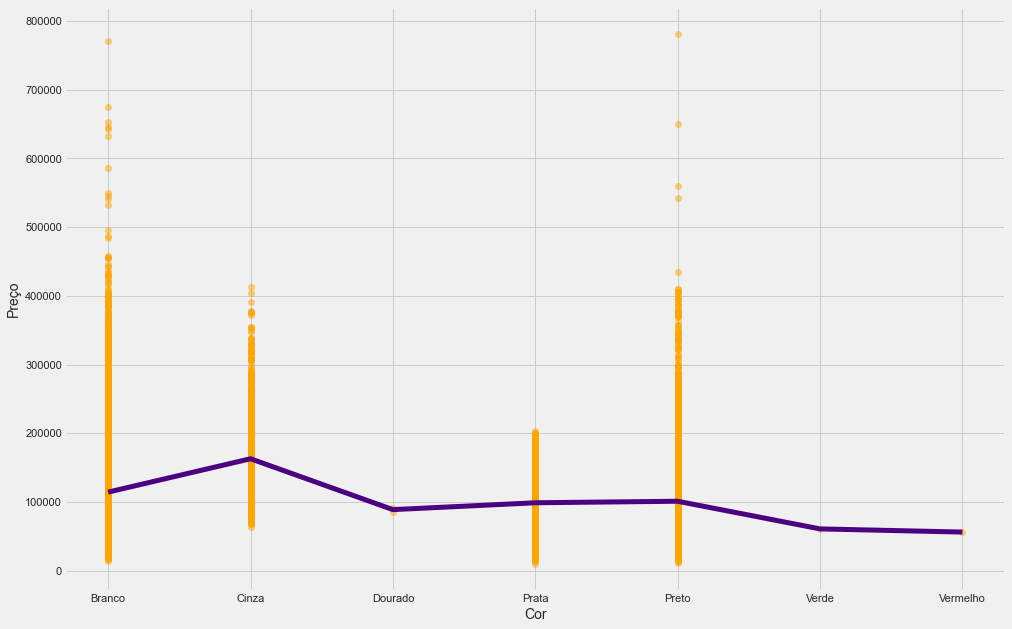

In [519]:
popular = treino[treino['tipo_marca'] == "Popular"]
# Preço médio das marcas populares por estado
pm = popular.groupby('cor')['preco'].mean().reset_index()
pm

# Gráfico do preço médio das picapes por estado

plt.figure(figsize=(15,10))
plt.plot(pm['cor'], pm['preco'],
         linewidth=5, color='indigo')
plt.scatter(popular['cor'], popular['preco'],
            alpha=0.5, color='orange', s = 40)
plt.xlabel('Cor', fontsize=14)
plt.ylabel('Preço', fontsize=14)
plt.xticks(pm.cor)
plt.show()

In [575]:

g1 = popular[popular['cor'] == 'Branco']
g2 = popular[popular['cor'] == 'Prata']
g3 = popular[popular['cor'] == 'Preto']


f_oneway(g1['preco'], g2['preco'], g3['preco'])


F_onewayResult(statistic=95.84838121410587, pvalue=3.681443392489183e-42)

O gráfico de barras e na tabela de frequência foi demonstrado que os carros na cor branca possuem valor médio um pouco acima em relacão aos carrros das cores prata e preto. Com o teste da ANOVA, a análise visual se confirmou. Da mesma forma que os carros não populares, as cores correspondem a categorias que influenciam na média de preços.

# Perguntas de negócio

## Qual o melhor estado cadastrado na base de dados para se vender um carro de marca popular e por quê?

Para definir o que seria marca popular foi realizado um levantamento nos veículos de imprensa que abordam a temática de venda de carros e verificado quais os 20 modelos de carros mais vendidos e as respectivas marcas. Da pesquisa de mercado, treze marcas foram consideradas populares, foram elas: 

* VOLKSWAGEN;
* CHEVROLET;
* HYUNDAI;
* TOYOTA;
* JEEP;
* FIAT;
* PEUGEOT;
* HONDA;
* FORD;
* RENAULT;
* NISSAN;
* CITROËN;
* KIA.


In [185]:
# definir condições e escolhas para tipo_marca

condicoes = [
    ((treino['marca'] == 'VOLKSWAGEN') & (treino['marca'] == 'CHEVROLET') & 
    (treino['marca'] == 'HYUNDAI') & (treino['marca'] == 'TOYOTA') &
    (treino['marca'] == 'JEEP') & (treino['marca'] == 'FIAT') &
    (treino['marca'] == 'PEUGEOT') & (treino['marca'] == 'HONDA') &
    (treino['marca'] == 'FORD') & (treino['marca'] == 'RENAULT') &
    (treino['marca'] == 'NISSAN') & (treino['marca'] == 'CITROËN') &
    (treino['marca'] == 'KIA')) ,
    
    ((treino['marca'] != 'VOLKSWAGEN') & (treino['marca'] != 'CHEVROLET') & 
    (treino['marca'] != 'HYUNDAI') & (treino['marca'] != 'TOYOTA') &
    (treino['marca'] != 'JEEP') & (treino['marca'] != 'FIAT') &
    (treino['marca'] != 'PEUGEOT') & (treino['marca'] != 'HONDA') &
    (treino['marca'] != 'FORD') & (treino['marca'] != 'RENAULT') &
    (treino['marca'] != 'NISSAN') & (treino['marca'] != 'CITROËN') &
    (treino['marca'] != 'KIA'))             
]

escolhas = [
           'Popular',
           'Não Popular'         
            ]

# criar nova coluna "tipo_marca" baseada em condições e escolhas
treino['tipo_marca'] = np.select(condicoes, escolhas, default = 'Popular')

treino

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,...,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,veiculo_alienado,preco,tipo_marca
0,300716223898539419613863097469899222392,8.0,NISSAN,KICKS,1.6 16V FLEXSTART SL 4P XTRONIC,2017,2017,67772,CVT,4,...,NaN,NaN,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,NaN,NaN,NaN,74732.59008,Popular
1,279639842134129588306469566150288644214,8.0,JEEP,COMPASS,2.0 16V FLEX LIMITED AUTOMÁTICO,2017,2017,62979,Automática,4,...,Aceita troca,NaN,NaN,IPVA pago,NaN,NaN,NaN,NaN,81965.33263,Popular
2,56414460810621048900295678236538171981,16.0,KIA,SORENTO,2.4 16V GASOLINA EX 7L AWD AUTOMÁTICO,2018,2019,44070,Automática,4,...,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,162824.81450,Popular
3,56862509826849933428086372390159405545,14.0,VOLKSWAGEN,AMAROK,2.0 HIGHLINE 4X4 CD 16V TURBO INTERCOOLER DIES...,2013,2015,85357,Automática,4,...,Aceita troca,NaN,NaN,IPVA pago,Licenciado,NaN,NaN,NaN,123681.35890,Popular
4,338980975753200343894519909855598027197,8.0,SSANGYONG,KORANDO,2.0 GLS 4X4 16V TURBO DIESEL 4P AUTOMÁTICO,2013,2015,71491,Automática,4,...,NaN,NaN,Todas as revisões feitas pela concessionária,NaN,NaN,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,NaN,82419.76389,Não Popular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29579,40985083650499509711752444068313401704,8.0,TOYOTA,HILUX,2.8 D-4D TURBO DIESEL CD SRX 4X4 AUTOMÁTICO,2021,2021,8150,Automática,4,...,Aceita troca,Único dono,NaN,IPVA pago,Licenciado,Garantia de fábrica,NaN,NaN,403015.28960,Popular
29580,164663177589009976281210123914772747797,8.0,VOLKSWAGEN,POLO,1.0 200 TSI HIGHLINE AUTOMÁTICO,2020,2020,17987,Automática,4,...,NaN,Único dono,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,Garantia de fábrica,NaN,NaN,88978.08050,Popular
29581,170866287186047465472146212778882034162,8.0,TOYOTA,HILUX,2.8 SRX 4X4 CD 16V DIESEL 4P AUTOMÁTICO,2019,2019,44742,Automática,4,...,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,218807.64870,Popular
29582,208909739337040262669325459666578363437,8.0,PEUGEOT,2008,1.6 16V FLEX ALLURE PACK 4P AUTOMÁTICO,2021,2022,35376,Automática,4,...,Aceita troca,Único dono,NaN,IPVA pago,Licenciado,NaN,NaN,NaN,68495.99069,Popular


In [32]:
# Frequências para pares de variáveis qualitativas
print(pd.crosstab(treino['tipo_marca'], treino['estado_vendedor']))

estado_vendedor  Acre (AC)  Alagoas (AL)  Amazonas (AM)  Bahia (BA)  \
tipo_marca                                                            
Não Popular              7             5              1         112   
Popular                 22           120             50         492   

estado_vendedor  Ceará (CE)  Espírito Santo (ES)  Goiás (GO)  Maranhão (MA)  \
tipo_marca                                                                    
Não Popular               5                    0         200              0   
Popular                  64                   21         589              7   

estado_vendedor  Mato Grosso (MT)  Mato Grosso do Sul (MS)  ...  Piauí (PI)  \
tipo_marca                                                  ...               
Não Popular                     2                        6  ...           0   
Popular                        31                       29  ...           6   

estado_vendedor  Rio Grande do Norte (RN)  Rio Grande do Sul (RS)  \
tipo_marca  

In [43]:
popular = treino[treino['tipo_marca'] == "Popular"]

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,...,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,veiculo_alienado,preco,tipo_marca
0,300716223898539419613863097469899222392,8.0,NISSAN,KICKS,1.6 16V FLEXSTART SL 4P XTRONIC,2017,2017,67772,CVT,4,...,NaN,NaN,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,NaN,NaN,NaN,74732.59008,Popular
1,279639842134129588306469566150288644214,8.0,JEEP,COMPASS,2.0 16V FLEX LIMITED AUTOMÁTICO,2017,2017,62979,Automática,4,...,Aceita troca,NaN,NaN,IPVA pago,NaN,NaN,NaN,NaN,81965.33263,Popular
2,56414460810621048900295678236538171981,16.0,KIA,SORENTO,2.4 16V GASOLINA EX 7L AWD AUTOMÁTICO,2018,2019,44070,Automática,4,...,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,162824.81450,Popular
3,56862509826849933428086372390159405545,14.0,VOLKSWAGEN,AMAROK,2.0 HIGHLINE 4X4 CD 16V TURBO INTERCOOLER DIES...,2013,2015,85357,Automática,4,...,Aceita troca,NaN,NaN,IPVA pago,Licenciado,NaN,NaN,NaN,123681.35890,Popular
5,304613157679868050200745320328901799358,13.0,HYUNDAI,HB20S,1.0 COMFORT PLUS 12V FLEX 4P MANUAL,2017,2018,85314,Manual,4,...,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51325.84691,Popular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29578,274512509350044168285072928236726854633,8.0,HYUNDAI,HB20,1.0 12V FLEX EVOLUTION MANUAL,2021,2022,28784,Manual,4,...,Aceita troca,NaN,NaN,IPVA pago,NaN,NaN,NaN,NaN,72797.54804,Popular
29579,40985083650499509711752444068313401704,8.0,TOYOTA,HILUX,2.8 D-4D TURBO DIESEL CD SRX 4X4 AUTOMÁTICO,2021,2021,8150,Automática,4,...,Aceita troca,Único dono,NaN,IPVA pago,Licenciado,Garantia de fábrica,NaN,NaN,403015.28960,Popular
29580,164663177589009976281210123914772747797,8.0,VOLKSWAGEN,POLO,1.0 200 TSI HIGHLINE AUTOMÁTICO,2020,2020,17987,Automática,4,...,NaN,Único dono,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,Garantia de fábrica,NaN,NaN,88978.08050,Popular
29581,170866287186047465472146212778882034162,8.0,TOYOTA,HILUX,2.8 SRX 4X4 CD 16V DIESEL 4P AUTOMÁTICO,2019,2019,44742,Automática,4,...,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,218807.64870,Popular


Vamos ordenar por estado a quantidade de veículos anunciados das treze marcas selecionadas como populares.

In [47]:
print(pd.value_counts(popular['estado_vendedor']))

São Paulo (SP)              11947
Rio de Janeiro (RJ)          1847
Paraná (PR)                  1775
Santa Catarina (SC)          1675
Minas Gerais (MG)            1302
Rio Grande do Sul (RS)       1119
Goiás (GO)                    589
Bahia (BA)                    492
Pernambuco (PE)               258
Alagoas (AL)                  120
Paraíba (PB)                  106
Rio Grande do Norte (RN)       82
Pará (PA)                      70
Ceará (CE)                     64
Amazonas (AM)                  50
Mato Grosso (MT)               31
Mato Grosso do Sul (MS)        29
Acre (AC)                      22
Espírito Santo (ES)            21
Tocantins (TO)                 19
Sergipe (SE)                   17
Maranhão (MA)                   7
Piauí (PI)                      6
Rondônia (RO)                   4
Roraima (RR)                    2
Name: estado_vendedor, dtype: int64


In [46]:
# Média dos preços por estado
popular[['estado_vendedor', 'preco']].groupby(['estado_vendedor'], as_index = True).mean().sort_values(by = 'preco', ascending = False)

,preco
estado_vendedor,
Piauí (PI),177119.450850
Sergipe (SE),176030.956082
Mato Grosso (MT),139269.017614
Goiás (GO),132683.510633
Alagoas (AL),124097.300048
Paraná (PR),123415.849250
Rio Grande do Sul (RS),122187.489794
Maranhão (MA),121041.689124
Minas Gerais (MG),119292.187885


In [49]:
# desvio padrão dos preços
popular[['estado_vendedor', 'preco']].groupby(['estado_vendedor'], as_index = True).std().sort_values(by = 'preco', ascending = False)

,preco
estado_vendedor,
Sergipe (SE),110768.281387
Rio Grande do Sul (RS),65021.733175
Minas Gerais (MG),64722.199487
Paraná (PR),63746.134426
Goiás (GO),62781.399428
Rio de Janeiro (RJ),62470.988225
Bahia (BA),61514.863125
Santa Catarina (SC),60938.483812
São Paulo (SP),60853.075368


Com a finalidade de de captar qual o melhor estado para se vender um carro, vamos examinar a variação dos preços das unidades da federação com mais de 100 observações de marcas populares. Com o maior número de observações é possível verificar e apresentar com mais segurança os resultados da análise descritiva dos dados. 

In [150]:
n = pd.DataFrame(pd.value_counts(popular['estado_vendedor']))
cem = n[n['estado_vendedor'] > 100]
cem

,estado_vendedor
São Paulo (SP),11947
Rio de Janeiro (RJ),1847
Paraná (PR),1775
Santa Catarina (SC),1675
Minas Gerais (MG),1302
Rio Grande do Sul (RS),1119
Goiás (GO),589
Bahia (BA),492
Pernambuco (PE),258
Alagoas (AL),120


In [151]:
d = popular[(popular['estado_vendedor'] == 'São Paulo (SP)') | (popular['estado_vendedor'] == 'Rio de Janeiro (RJ)') | 
            (popular['estado_vendedor'] == "Paraná (PR)") | (popular['estado_vendedor'] == "Santa Catarina (SC)") |
            (popular['estado_vendedor'] == "Minas Gerais (MG)") | (popular['estado_vendedor'] == "Rio Grande do Sul (RS)") |
            (popular['estado_vendedor'] == "Goiás (GO)") | (popular['estado_vendedor'] == "Bahia (BA)") |
            (popular['estado_vendedor'] == "Pernambuco (PE)") | (popular['estado_vendedor'] == "Alagoas (AL)") |
            (popular['estado_vendedor'] == "Paraíba (PB)")]

In [152]:
#df.loc[ df[“column_name”] == “some_value”, “column_name”] = “value”
d.loc[ d["estado_vendedor"] == "São Paulo (SP)", "estado_vendedor"] = "SP"
d.loc[ d["estado_vendedor"] == "Rio de Janeiro (RJ)", "estado_vendedor"] = "RJ"
d.loc[ d["estado_vendedor"] == "Paraná (PR)", "estado_vendedor"] = "PR"
d.loc[ d["estado_vendedor"] == "Santa Catarina (SC)", "estado_vendedor"] = "SC"
d.loc[ d["estado_vendedor"] == "Minas Gerais (MG)", "estado_vendedor"] = "MG"
d.loc[ d["estado_vendedor"] == "Rio Grande do Sul (RS)", "estado_vendedor"] = "RS"
d.loc[ d["estado_vendedor"] == "Goiás (GO)", "estado_vendedor"] = "GO"
d.loc[ d["estado_vendedor"] == "Bahia (BA)", "estado_vendedor"] = "BA"
d.loc[ d["estado_vendedor"] == "Pernambuco (PE)", "estado_vendedor"] = "PE"
d.loc[ d["estado_vendedor"] == "Alagoas (AL)", "estado_vendedor"] = "AL"
d.loc[ d["estado_vendedor"] == "Paraíba (PB)", "estado_vendedor"] = "PB"

/Users/pedropietrafesa/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [186]:
# Preço médio das marcas populares por estado
preco_medio = d.groupby('estado_vendedor')['preco'].mean().reset_index()
preco_medio

,estado_vendedor,preco
0,AL,124097.300048
1,BA,114160.885441
2,GO,132683.510633
3,MG,119292.187885
4,PB,93192.638519
5,PE,104784.482652
6,PR,123415.849250
7,RJ,115379.100608
8,RS,122187.489794
9,SC,114947.718035


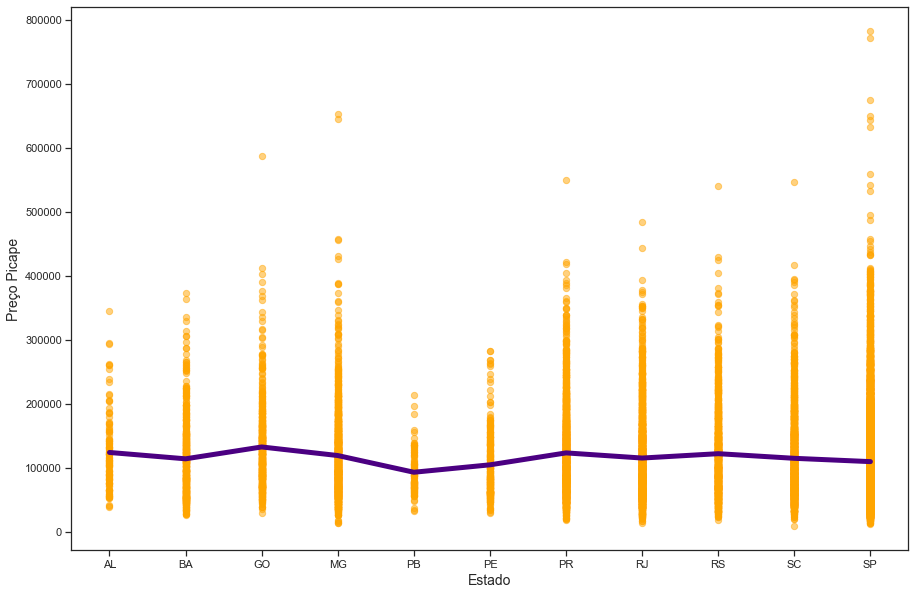

In [154]:
# Gráfico do preço médio dos carros marca popular por estado

plt.figure(figsize=(15,10))
plt.plot(preco_medio['estado_vendedor'], preco_medio['preco'],
         linewidth=5, color='indigo')
plt.scatter(d['estado_vendedor'], d['preco'],
            alpha=0.5, color='orange', s = 40)
plt.xlabel('Estado', fontsize=14)
plt.ylabel('Preço', fontsize=14)
plt.xticks(preco_medio.estado_vendedor)
plt.show()

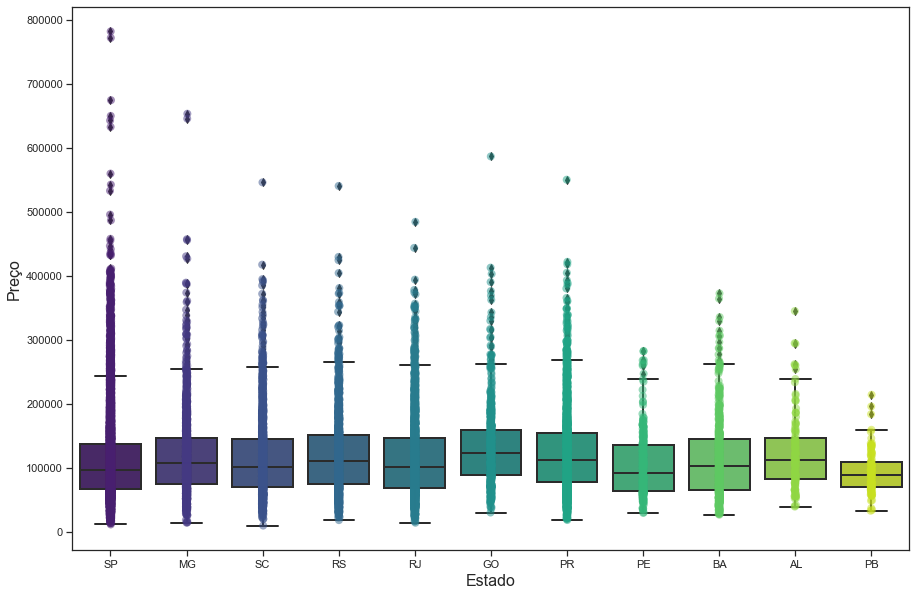

In [155]:
# Boxplot da variável dependente 'preço' por estado

plt.figure(figsize=(15,10))
sns.boxplot(data=d, x='estado_vendedor', y='preco',
            linewidth=2, orient='v', palette='viridis')
sns.stripplot(data=d, x='estado_vendedor', y='preco',
              palette='viridis', jitter=0.01, size=8, alpha=0.5)
plt.ylabel('Preço', fontsize=16)
plt.xlabel('Estado', fontsize=16)
plt.show()

<Figure size 1080x720 with 0 Axes>

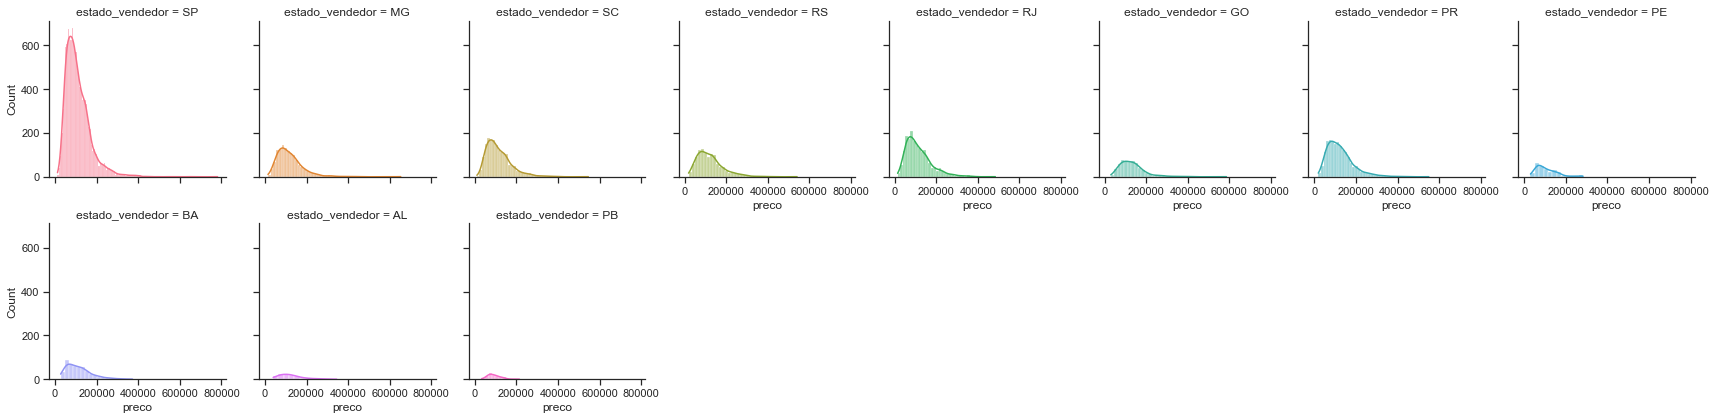

In [156]:
# Kernel density estimation (KDE) - função densidade de probabilidade da
#variável dependente ('preço'), com histograma e por estado separadamente

plt.figure(figsize=(15,10))
g = sns.FacetGrid(d, col='estado_vendedor', col_wrap=8, hue='estado_vendedor')
g.map_dataframe(sns.histplot, kde=True, x='preco')
plt.show()

In [157]:
temp = d[["estado_vendedor", "preco"]]
g1 = temp[temp['estado_vendedor'] == 'SP']
g2 = temp[temp['estado_vendedor'] == 'RJ']
g3 = temp[temp['estado_vendedor'] == 'MG']
g4 = temp[temp['estado_vendedor'] == 'SC']
g5 = temp[temp['estado_vendedor'] == 'RS']
g6 = temp[temp['estado_vendedor'] == 'GO']
g7 = temp[temp['estado_vendedor'] == 'PR']
g8 = temp[temp['estado_vendedor'] == 'PE']
g9 = temp[temp['estado_vendedor'] == 'BA']
g10 = temp[temp['estado_vendedor'] == 'AL']
g11 = temp[temp['estado_vendedor'] == 'PB']

f_oneway(g1['preco'], g2['preco'], g3['preco'], g4['preco'],
        g5['preco'], g6['preco'], g7['preco'], g8['preco'],
         g9['preco'], g10['preco'], g11['preco'])


F_onewayResult(statistic=20.34564869227351, pvalue=4.798190300457994e-38)

Do teste de ANOVA foi verificado que existe diferença nos preços médios dos carros das marcas populares dos dez estados. No gráfico de boxplot nota-se que a dispersão dos dados não são tão dispares. O estado de São Paulo tem um número maior de outliers, com os carros de marcas populares sendo anunciados próximo de 800 mil reais. Vale ressaltar que o número de observações paulistas são 6,5 vezes maior que o segundo estado, Rio de Janeiro, com informações no banco de dados. Assim, importante verificar o valor médio de preços. O estado de Goiás é a unidade federativa em que a média foi maior. Por isso, o argumento é de que Goiás é o melhor estado cadastrado, em média, para se vender carro de marca popular. 

## Qual o melhor estado para se comprar uma picape com transmissão automática e por quê?

O interesse neste momento é na perspectiva do cliente, em qual estado é melhor comprar uma picape com câmbio automático, ou seja, em média onde os clientes podem encontrar o menor valor. Da mesma forma que analisamos a venda de carros, vamos observar os estados com mais de 100 anuncios.

In [162]:
picape = treino[(treino['tipo'] == "Picape") & (treino['cambio'] == "Automática")]

In [163]:
print(pd.value_counts(picape['estado_vendedor']))

São Paulo (SP)              1712
Paraná (PR)                  348
Rio de Janeiro (RJ)          318
Santa Catarina (SC)          283
Minas Gerais (MG)            211
Rio Grande do Sul (RS)       198
Goiás (GO)                   102
Bahia (BA)                    68
Pernambuco (PE)               14
Alagoas (AL)                  12
Acre (AC)                      6
Mato Grosso (MT)               6
Mato Grosso do Sul (MS)        5
Sergipe (SE)                   5
Paraíba (PB)                   4
Piauí (PI)                     4
Tocantins (TO)                 3
Rio Grande do Norte (RN)       1
Name: estado_vendedor, dtype: int64


In [164]:
# Média dos preços por estado
picape[['estado_vendedor', 'preco']].groupby(['estado_vendedor'], as_index = True).mean().sort_values(by = 'preco', ascending = False)

,preco
estado_vendedor,
Sergipe (SE),298195.309680
Alagoas (AL),218671.542767
Mato Grosso (MT),214102.315650
Piauí (PI),208181.077750
Goiás (GO),208153.658438
Bahia (BA),206364.799217
Paraná (PR),198384.949643
Minas Gerais (MG),195702.914793
Rio Grande do Sul (RS),195251.763133


In [165]:
# desvio padrão dos preços
picape[['estado_vendedor', 'preco']].groupby(['estado_vendedor'], as_index = True).std().sort_values(by = 'preco', ascending = False)

,preco
estado_vendedor,
Santa Catarina (SC),114099.879163
São Paulo (SP),105203.461170
Goiás (GO),100476.424902
Minas Gerais (MG),92135.235477
Rio Grande do Sul (RS),91456.494603
Paraná (PR),90510.890598
Pernambuco (PE),89384.835319
Alagoas (AL),85424.677636
Rio de Janeiro (RJ),84677.479835


In [166]:
n = pd.DataFrame(pd.value_counts(picape['estado_vendedor']))
cem = n[n['estado_vendedor'] > 100]
cem


,estado_vendedor
São Paulo (SP),1712
Paraná (PR),348
Rio de Janeiro (RJ),318
Santa Catarina (SC),283
Minas Gerais (MG),211
Rio Grande do Sul (RS),198
Goiás (GO),102


In [167]:
d_picape = picape[(picape['estado_vendedor'] == 'São Paulo (SP)') | (picape['estado_vendedor'] == 'Rio de Janeiro (RJ)') | 
            (picape['estado_vendedor'] == "Paraná (PR)") | (picape['estado_vendedor'] == "Santa Catarina (SC)") |
            (picape['estado_vendedor'] == "Minas Gerais (MG)") | (picape['estado_vendedor'] == "Rio Grande do Sul (RS)") |
            (picape['estado_vendedor'] == "Goiás (GO)")]

In [168]:
#df.loc[ df[“column_name”] == “some_value”, “column_name”] = “value”
d_picape.loc[ d_picape["estado_vendedor"] == "São Paulo (SP)", "estado_vendedor"] = "SP"
d_picape.loc[ d_picape["estado_vendedor"] == "Rio de Janeiro (RJ)", "estado_vendedor"] = "RJ"
d_picape.loc[ d_picape["estado_vendedor"] == "Paraná (PR)", "estado_vendedor"] = "PR"
d_picape.loc[ d_picape["estado_vendedor"] == "Santa Catarina (SC)", "estado_vendedor"] = "SC"
d_picape.loc[ d_picape["estado_vendedor"] == "Minas Gerais (MG)", "estado_vendedor"] = "MG"
d_picape.loc[ d_picape["estado_vendedor"] == "Rio Grande do Sul (RS)", "estado_vendedor"] = "RS"
d_picape.loc[ d_picape["estado_vendedor"] == "Goiás (GO)", "estado_vendedor"] = "GO"

/Users/pedropietrafesa/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [169]:
# Preço médio dos estudantes por estado
preco_medio = d_picape.groupby('estado_vendedor')['preco'].mean().reset_index()
preco_medio

,estado_vendedor,preco
0,GO,208153.658438
1,MG,195702.914793
2,PR,198384.949643
3,RJ,181660.344686
4,RS,195251.763133
5,SC,185848.618545
6,SP,188427.484637


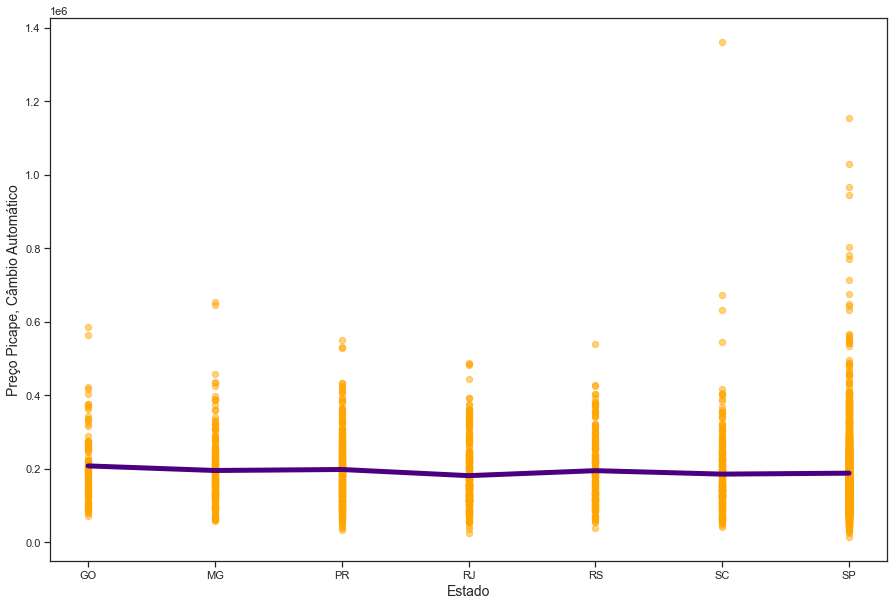

In [170]:
# Gráfico do preço médio das picapes por estado

plt.figure(figsize=(15,10))
plt.plot(preco_medio['estado_vendedor'], preco_medio['preco'],
         linewidth=5, color='indigo')
plt.scatter(d_picape['estado_vendedor'], d_picape['preco'],
            alpha=0.5, color='orange', s = 40)
plt.xlabel('Estado', fontsize=14)
plt.ylabel('Preço Picape, Câmbio Automático', fontsize=14)
plt.xticks(preco_medio.estado_vendedor)
plt.show()

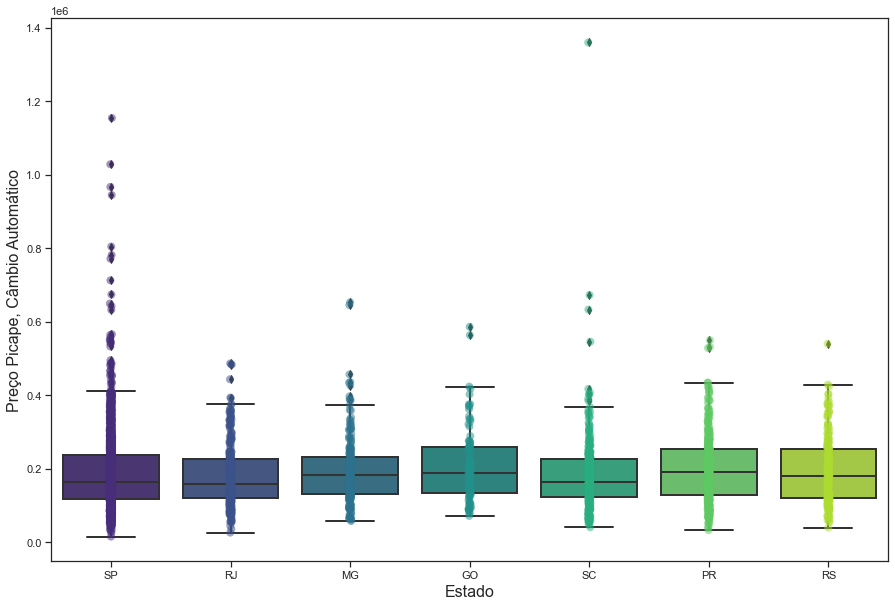

In [171]:
# Boxplot da variável dependente 'preço' por estado

plt.figure(figsize=(15,10))
sns.boxplot(data=d_picape, x='estado_vendedor', y='preco',
            linewidth=2, orient='v', palette='viridis')
sns.stripplot(data=d_picape, x='estado_vendedor', y='preco',
              palette='viridis', jitter=0.01, size=8, alpha=0.5)
plt.ylabel('Preço Picape, Câmbio Automático', fontsize=16)
plt.xlabel('Estado', fontsize=16)
plt.show()

<Figure size 1080x720 with 0 Axes>

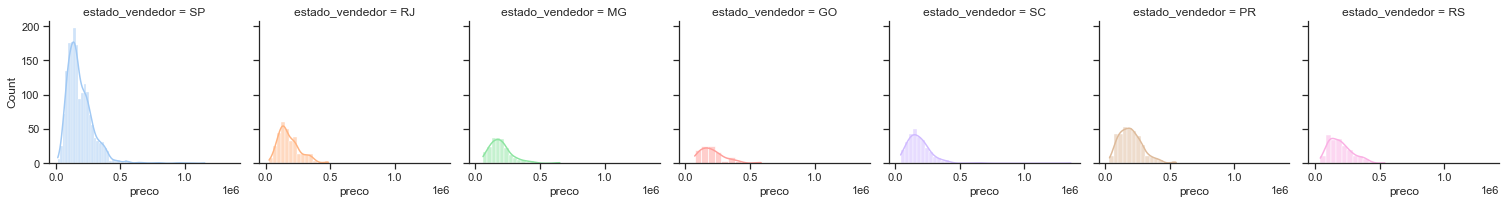

In [172]:
# Kernel density estimation (KDE) - função densidade de probabilidade da
#variável dependente ('preço'), com histograma e por estado separadamente

plt.figure(figsize=(15,10))
g = sns.FacetGrid(d_picape, col='estado_vendedor', col_wrap=8, hue='estado_vendedor')
g.map_dataframe(sns.histplot, kde=True, x='preco')
plt.show()

In [173]:
temp = d_picape[["estado_vendedor", "preco"]]
g1 = temp[temp['estado_vendedor'] == 'SP']
g2 = temp[temp['estado_vendedor'] == 'RJ']
g3 = temp[temp['estado_vendedor'] == 'MG']
g4 = temp[temp['estado_vendedor'] == 'SC']
g5 = temp[temp['estado_vendedor'] == 'RS']
g6 = temp[temp['estado_vendedor'] == 'GO']
g7 = temp[temp['estado_vendedor'] == 'PR']


f_oneway(g1['preco'], g2['preco'], g3['preco'], g4['preco'],
        g5['preco'], g6['preco'], g7['preco'])


F_onewayResult(statistic=1.6650280762952767, pvalue=0.12546566702124298)

No teste da ANOVA, não rejeitamos a hipótese nula de que não há diferenças significativas entre as médias dos grupos em estudo como pôde ser visto no gráfico que apresentou o preço médio das picapes com câmbio automático por estado, a linha roxa teve um comportamento próximo a uma reta horizontal. Importante pontuar o volume maior de dados no estado de São Paulo, bem como mais  outliers entre os anunciantes paulistas do que de outros estados. Assim, como a dispersão dos dados foi menor no estado do Rio de Janeiro e, numericamente, o valor da média de preços neste estado também esteve abaixo do que em outras unidades da federação, é mais vantajoso comprar uma picape automática no Rio de Janeiro do que em outro estado. 

## Qual o melhor estado para se comprar carros que ainda estejam dentro da garantia de fábrica e por quê?

In [138]:
garantia = treino[treino['garantia_de_fábrica'] == "Garantia de fábrica"]
garantia

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,...,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,veiculo_alienado,preco,tipo_marca
4,338980975753200343894519909855598027197,8.0,SSANGYONG,KORANDO,2.0 GLS 4X4 16V TURBO DIESEL 4P AUTOMÁTICO,2013,2015,71491,Automática,4,...,NaN,NaN,Todas as revisões feitas pela concessionária,NaN,NaN,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,NaN,82419.76389,Não Popular
8,27193355972239090268287282344066791959,8.0,VOLKSWAGEN,UP,1.0 TSI HIGH UP 12V FLEX 4P MANUAL,2017,2018,39987,Manual,4,...,NaN,Único dono,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,NaN,75088.72191,Popular
17,22623637632558238619093107555320587591,8.0,VOLKSWAGEN,POLO,1.0 200 TSI COMFORTLINE AUTOMÁTICO,2019,2019,35346,Automática,4,...,NaN,Único dono,NaN,IPVA pago,Licenciado,Garantia de fábrica,NaN,NaN,52375.52005,Popular
19,118295225597332705218254827343258102397,8.0,CHEVROLET,ONIX,1.0 TURBO FLEX PLUS PREMIER AUTOMÁTICO,2021,2022,7277,Manual,4,...,NaN,Único dono,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,NaN,148360.04310,Popular
21,161689246994150584328334702158353189075,8.0,PORSCHE,CAYENNE,3.0 V6 GASOLINA AWD TIPTRONIC S,2020,2020,8220,Automática,4,...,Aceita troca,NaN,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,NaN,377512.64450,Não Popular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29564,7153831053306885937235229425685159881,8.0,VOLKSWAGEN,GOL,1.6 16V MSI TOTALFLEX 4P AUTOMÁTICO,2021,2021,21166,Automática,4,...,NaN,Único dono,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,NaN,199455.69150,Popular
29566,264948049948751322976294662307060386869,8.0,FIAT,STRADA,1.3 FIREFLY FLEX FREEDOM CS MANUAL,2021,2022,2596,Manual,4,...,NaN,Único dono,NaN,IPVA pago,Licenciado,Garantia de fábrica,NaN,NaN,92239.27440,Popular
29567,148783390470394554026358945089096197309,8.0,JEEP,RENEGADE,1.8 16V FLEX 4P AUTOMÁTICO,2019,2020,31095,Automática,4,...,NaN,Único dono,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,NaN,55604.99991,Popular
29579,40985083650499509711752444068313401704,8.0,TOYOTA,HILUX,2.8 D-4D TURBO DIESEL CD SRX 4X4 AUTOMÁTICO,2021,2021,8150,Automática,4,...,Aceita troca,Único dono,NaN,IPVA pago,Licenciado,Garantia de fábrica,NaN,NaN,403015.28960,Popular


In [139]:
print(pd.value_counts(garantia['estado_vendedor']))

São Paulo (SP)              2307
Rio de Janeiro (RJ)          412
Paraná (PR)                  389
Santa Catarina (SC)          330
Rio Grande do Sul (RS)       281
Minas Gerais (MG)            264
Goiás (GO)                   186
Alagoas (AL)                  58
Bahia (BA)                    51
Pernambuco (PE)               20
Pará (PA)                     17
Mato Grosso do Sul (MS)       13
Rio Grande do Norte (RN)       9
Espírito Santo (ES)            9
Amazonas (AM)                  9
Sergipe (SE)                   3
Mato Grosso (MT)               2
Acre (AC)                      2
Ceará (CE)                     1
Tocantins (TO)                 1
Paraíba (PB)                   1
Name: estado_vendedor, dtype: int64


In [140]:
# Média dos preços por estado
garantia[['estado_vendedor', 'preco']].groupby(['estado_vendedor'], as_index = True).mean().sort_values(by = 'preco', ascending = False)

,preco
estado_vendedor,
Sergipe (SE),367138.430267
Tocantins (TO),243002.217000
Mato Grosso (MT),197657.066550
Rio de Janeiro (RJ),179109.858402
Rio Grande do Sul (RS),176442.236457
Paraná (PR),175578.245502
Goiás (GO),174521.413156
Santa Catarina (SC),173798.439856
São Paulo (SP),166751.081005


In [141]:
# desvio padrão dos preços
garantia[['estado_vendedor', 'preco']].groupby(['estado_vendedor'], as_index = True).std().sort_values(by = 'preco', ascending = False)

,preco
estado_vendedor,
Acre (AC),109750.277928
Santa Catarina (SC),93082.399441
Goiás (GO),90809.754430
Rio Grande do Sul (RS),89532.093836
Bahia (BA),86728.918504
Rio de Janeiro (RJ),86161.814456
Sergipe (SE),85149.900866
São Paulo (SP),83009.688864
Paraná (PR),82210.721671


In [174]:
n = pd.DataFrame(pd.value_counts(garantia['estado_vendedor']))
cem = n[n['estado_vendedor'] > 100]
cem

,estado_vendedor
São Paulo (SP),2307
Rio de Janeiro (RJ),412
Paraná (PR),389
Santa Catarina (SC),330
Rio Grande do Sul (RS),281
Minas Gerais (MG),264
Goiás (GO),186


In [175]:
d_garantia = garantia[(garantia['estado_vendedor'] == 'São Paulo (SP)') | (garantia['estado_vendedor'] == 'Rio de Janeiro (RJ)') | 
            (garantia['estado_vendedor'] == "Paraná (PR)") | (garantia['estado_vendedor'] == "Santa Catarina (SC)") |
            (garantia['estado_vendedor'] == "Minas Gerais (MG)") | (garantia['estado_vendedor'] == "Rio Grande do Sul (RS)") |
            (garantia['estado_vendedor'] == "Goiás (GO)")]

In [176]:
#df.loc[ df[“column_name”] == “some_value”, “column_name”] = “value”
d_garantia.loc[ d_garantia["estado_vendedor"] == "São Paulo (SP)", "estado_vendedor"] = "SP"
d_garantia.loc[ d_garantia["estado_vendedor"] == "Rio de Janeiro (RJ)", "estado_vendedor"] = "RJ"
d_garantia.loc[ d_garantia["estado_vendedor"] == "Paraná (PR)", "estado_vendedor"] = "PR"
d_garantia.loc[ d_garantia["estado_vendedor"] == "Santa Catarina (SC)", "estado_vendedor"] = "SC"
d_garantia.loc[ d_garantia["estado_vendedor"] == "Minas Gerais (MG)", "estado_vendedor"] = "MG"
d_garantia.loc[ d_garantia["estado_vendedor"] == "Rio Grande do Sul (RS)", "estado_vendedor"] = "RS"
d_garantia.loc[ d_garantia["estado_vendedor"] == "Goiás (GO)", "estado_vendedor"] = "GO"

/Users/pedropietrafesa/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [177]:
# Preço médio dos estudantes por estado
preco_medio = d_garantia.groupby('estado_vendedor')['preco'].mean().reset_index()
preco_medio

,estado_vendedor,preco
0,GO,174521.413156
1,MG,161206.273892
2,PR,175578.245502
3,RJ,179109.858402
4,RS,176442.236457
5,SC,173798.439856
6,SP,166751.081005


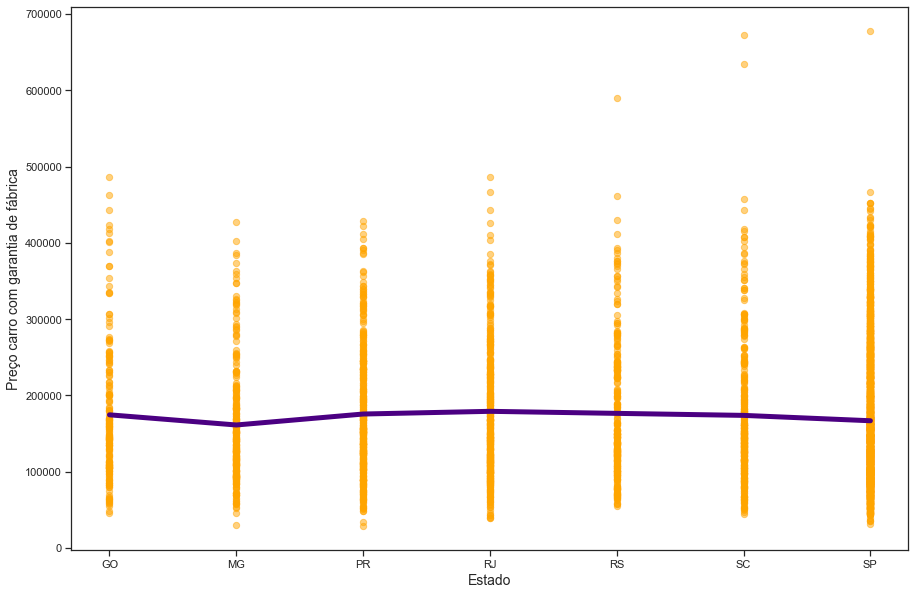

In [178]:
# Gráfico do preço médio das picapes por estado

plt.figure(figsize=(15,10))
plt.plot(preco_medio['estado_vendedor'], preco_medio['preco'],
         linewidth=5, color='indigo')
plt.scatter(d_garantia['estado_vendedor'], d_garantia['preco'],
            alpha=0.5, color='orange', s = 40)
plt.xlabel('Estado', fontsize=14)
plt.ylabel('Preço carro com garantia de fábrica', fontsize=14)
plt.xticks(preco_medio.estado_vendedor)
plt.show()

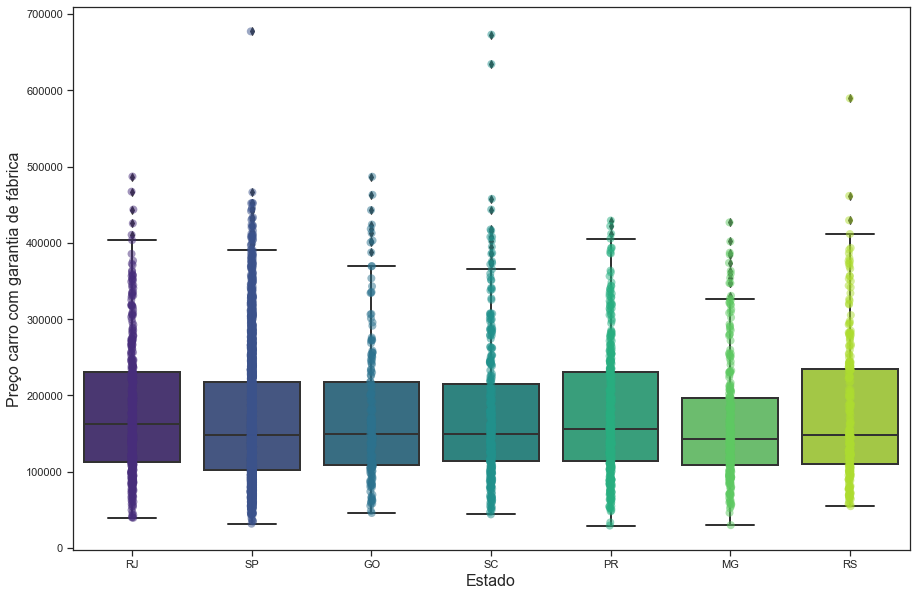

In [179]:
# Boxplot da variável dependente 'preço' por estado

plt.figure(figsize=(15,10))
sns.boxplot(data=d_garantia, x='estado_vendedor', y='preco',
            linewidth=2, orient='v', palette='viridis')
sns.stripplot(data=d_garantia, x='estado_vendedor', y='preco',
              palette='viridis', jitter=0.01, size=8, alpha=0.5)
plt.ylabel('Preço carro com garantia de fábrica', fontsize=16)
plt.xlabel('Estado', fontsize=16)
plt.show()

<Figure size 1080x720 with 0 Axes>

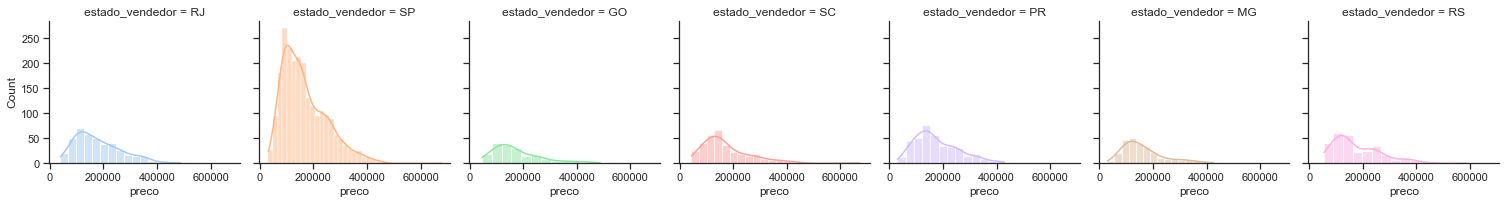

In [180]:
# Kernel density estimation (KDE) - função densidade de probabilidade da
#variável dependente ('preço'), com histograma e por estado separadamente

plt.figure(figsize=(15,10))
g = sns.FacetGrid(d_garantia, col='estado_vendedor', col_wrap=8, hue='estado_vendedor')
g.map_dataframe(sns.histplot, kde=True, x='preco')
plt.show()

In [181]:
temp = d_garantia[["estado_vendedor", "preco"]]
g1 = temp[temp['estado_vendedor'] == 'SP']
g2 = temp[temp['estado_vendedor'] == 'RJ']
g3 = temp[temp['estado_vendedor'] == 'MG']
g4 = temp[temp['estado_vendedor'] == 'SC']
g5 = temp[temp['estado_vendedor'] == 'RS']
g6 = temp[temp['estado_vendedor'] == 'GO']
g7 = temp[temp['estado_vendedor'] == 'PR']


f_oneway(g1['preco'], g2['preco'], g3['preco'], g4['preco'],
        g5['preco'], g6['preco'], g7['preco'])

F_onewayResult(statistic=2.5959563148742038, pvalue=0.016358105278713536)

Em relação as análises sobre a venda de marcas populares e a compra de picapes com câmbio automático, podemos observar por meio dos boxplots que os preços dos carros com garantia de fábria tiveram uma variação maior na distribuição dos dados. Por outro lado, uma quantidade menor de outliers, com São Paulo e Santa Catarina apresentando os preços discrepantes mais altos. O teste da ANOVA, a um nível de significância estatística de 5%, rejeita a hipótese nula de que não há diferenças significativas entre as médias dos preços dos dez estados. Minas Gerais correspondeu a unidade da federação com menor dispersão dos preços anunciados e na média com menor valor. Com isso, podemos concluir que é melhor estado para comprar um carro com garantia de fábrica. 

